In [1]:
import os

if os.path.exists('requirements.txt'):
    !pip3 install -r requirements.txt
else:
    !pip3 install pandas seaborn scikit-learn xgboost
    !pip3 freeze > requirements.txt

     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ------------------------------------ - 153.6/160.4 kB 9.0 MB/s eta 0:00:01
     -------------------------------------- 160.4/160.4 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ---------------------------------------- 61.2/61.2 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.6 kB ? eta -:--:--
     ---------------------------------------- 65.6/65.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00


ERROR: Ignored the following versions that require a different python version: 0.28.0 Requires-Python >=3.7, <3.11; 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11; 1.8.0rc3 Requires-Python >=3.8,<3.11; 1.8.0rc4 Requires-Python >=3.8,<3.11; 1.8.1 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement tensorflow-io-gcs-filesystem==0.34.0 (from versions: 0.29.0, 0.30.0, 0.31.0)
ERROR: No matching distribution found for tensorflow-io-gcs-filesystem==0.34.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Mercedes-Benz Greener Manufacturing Dataset

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

### File descriptions

Variables with letters are categorical. Variables with 0/1 are binary values.

- train.csv - the training set
- test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
- sample_submission.csv - a sample submission file in the correct format

In [3]:
df_train = pd.read_csv('./data/train.csv').drop(columns=['ID'])
df_train.sample(30)

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1910,91.44,o,l,ae,f,d,ah,g,f,0,...,0,0,0,0,0,0,0,0,0,0
2315,110.60,ak,s,as,c,d,k,g,r,0,...,1,0,0,0,0,0,0,0,0,0
1682,95.59,z,r,ae,c,d,ae,a,k,0,...,1,0,0,0,0,0,0,0,0,0
2972,89.40,n,l,ae,f,d,q,d,s,0,...,0,0,0,0,0,0,0,0,0,0
2698,88.16,z,aa,e,e,d,m,g,o,0,...,1,0,0,0,0,0,0,0,0,0
2658,106.98,h,b,ae,c,d,m,a,d,0,...,0,0,1,0,0,0,0,0,0,0
624,118.31,z,aa,as,c,d,c,i,o,0,...,0,1,0,0,0,0,0,0,0,0
3620,87.06,am,a,ai,f,d,v,j,i,0,...,0,0,0,0,0,0,0,0,0,0
249,90.47,y,aa,ai,c,d,i,d,f,0,...,1,0,0,0,0,0,0,0,0,0
2885,108.75,ak,w,as,f,d,p,d,t,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(df_train.columns)

377

In [5]:
df_train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
df_train.isna().sum().sum()

0

In [7]:
df_train.dtypes.value_counts()

int64      368
object       8
float64      1
Name: count, dtype: int64

In [22]:
cols_to_dummy = list(df_train.select_dtypes(include='object').columns)
cols_to_dummy

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

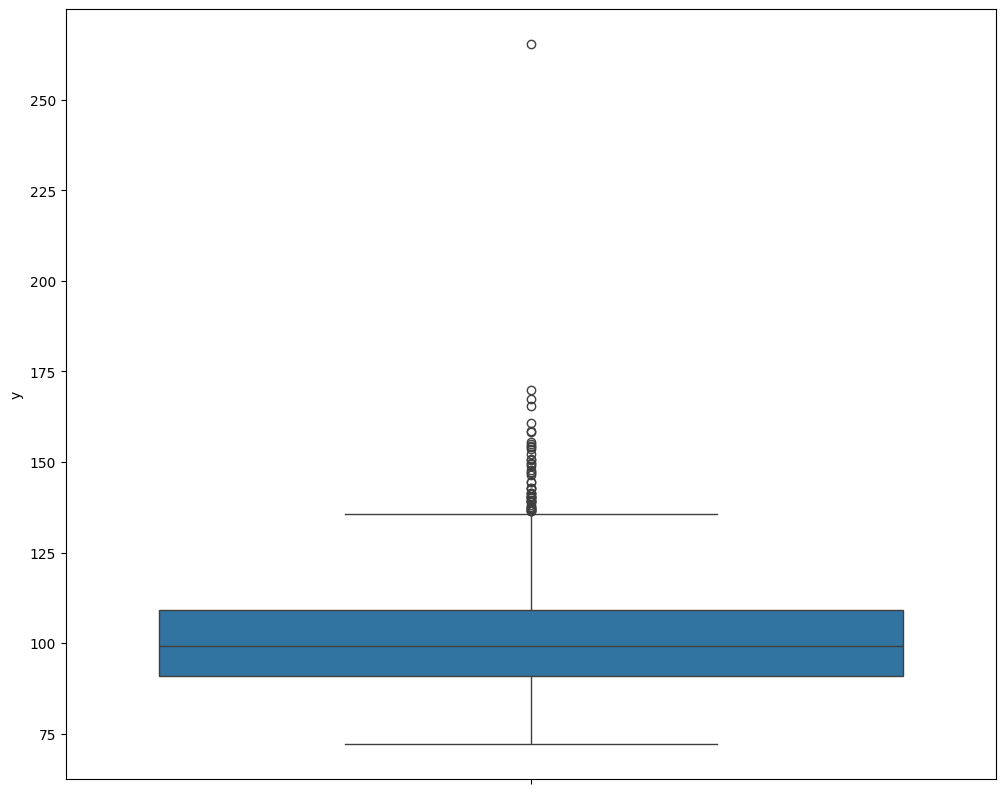

In [9]:
def plot_boxplot(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 10))
        sns.boxplot(df[col])
        plt.show()

plot_boxplot(df_train, ['y'])

In [10]:
def remove_outliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.copy(deep=True)[(df[col] > lower_bound) & (df[col] < upper_bound)]

filtered_df_train = remove_outliers(df_train, 'y')
filtered_df_train['y'].describe()

count    4159.000000
mean      100.096163
std        11.436140
min        72.110000
25%        90.780000
50%        98.970000
75%       108.820000
max       135.530000
Name: y, dtype: float64

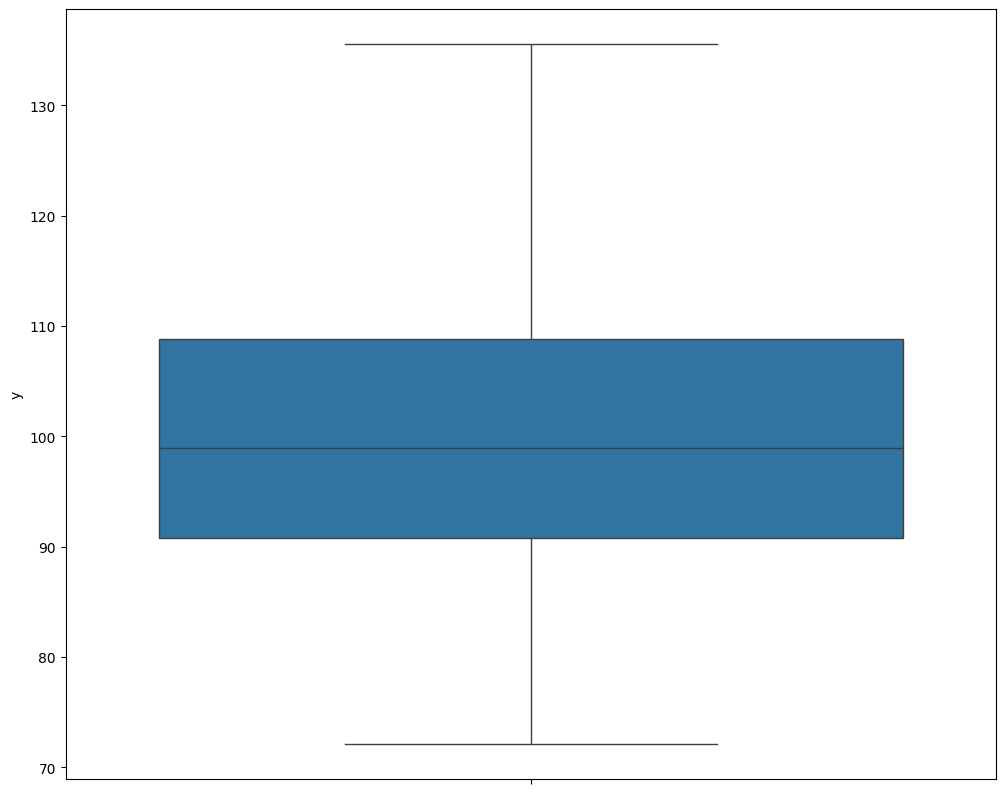

In [11]:
plot_boxplot(filtered_df_train, ['y'])

In [12]:
filtered_df_train = pd.get_dummies(df_train, columns=cols_to_dummy).astype('int')
filtered_df_train.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,88,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
filtered_df_train.sample(30)

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2098,113,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2552,99,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3039,105,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2718,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2556,109,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4206,109,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,78,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3825,96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
970,100,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3311,77,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
non_variable_cols = [
    col for col in filtered_df_train.columns if filtered_df_train[col].nunique() == 1
]
non_variable_cols

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [15]:
filtered_df_train = filtered_df_train.drop(columns=non_variable_cols)
filtered_df_train.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
if not os.path.exists('./outputs'):
    os.makedirs('./outputs')

filtered_df_train.to_csv('./outputs/train_clean.csv', index=False)

In [23]:
filtered_df_train.isna().sum()

y       0
X10     0
X12     0
X13     0
X14     0
       ..
X8_u    0
X8_v    0
X8_w    0
X8_x    0
X8_y    0
Length: 552, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in filtered_df_train.select_dtypes(include='object').columns:
    filtered_df_train[col] = label_encoder.fit_transform(filtered_df_train[col])

#scaling features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(filtered_df_train.drop(columns=['y']))


In [32]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create the SelectKBest object with the f_regression scoring function
selector = SelectKBest(score_func=f_regression, k=30)
selected_features = selector.fit_transform(filtered_df_train.drop(columns=['y']), filtered_df_train['y'])
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = filtered_df_train.drop(columns=['y']).columns[selected_feature_indices]
print(selected_feature_names)

Index(['X28', 'X29', 'X54', 'X76', 'X118', 'X119', 'X127', 'X136', 'X162',
       'X166', 'X178', 'X185', 'X232', 'X234', 'X250', 'X261', 'X263', 'X272',
       'X275', 'X276', 'X279', 'X313', 'X314', 'X316', 'X328', 'X378', 'X0_ak',
       'X0_az', 'X0_x', 'X2_n'],
      dtype='object')
